# Programming Hidden Markov Models (60 P)

In this exercise, you will experiment with hidden Markov models, in particular, applying them to modeling character sequences, and analyzing the learned solution. As a starting point, you are provided in the file `hmm.py` with a basic implementation of an HMM and of the Baum-Welch training algorithm. The names of variables used in the code and the references to equations are taken from the HMM paper by Rabiner et al. downloable from ISIS. In addition to the variables described in this paper, we use two additional variables: $Z$ for the emission probabilities of observations $O$, and $\psi$ (i.e. psi) for collecting the statistics of Equation (40c).


## Question 1: Analysis of a small HMM (30 P)

We first look at a toy example of an HMM trained on a binary sequence. The training procedure below consists of 100 iterations of the Baum-Welch procedure. It runs the HMM learning algorithm for some toy binary data and prints the parameters learned by the HMM (i.e. matrices $A$ and $B$).

### Question 1a: Qualitative Analysis (15 P)

* *Run* the code several times to check that the behavior is consistent.
* *Describe* qualitatively the solution $A,B$ learned by the model.
* *Explain* how the solution $\lambda = (A,B)$ relates to the sequence of observations $O$ that has been modeled.


In [1]:
import numpy as np,hmm
import matplotlib.pyplot as plt

O = np.array([1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,1,
                 0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,
                 0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,
                 0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,
                 1,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,
                 0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,
                 0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0])

hmmtoy = hmm.HMM(4,2)

for k in range(100):
    hmmtoy.loaddata(O)
    hmmtoy.forward()
    hmmtoy.backward()
    hmmtoy.learn()

print('A')
print("\n".join([" ".join(['%.3f'%a for a in aa]) for aa in hmmtoy.A]))
print(' ')
print('B')
print("\n".join([" ".join(['%.3f'%b for b in bb]) for bb in hmmtoy.B]))
print(' ')
print('Pi')
print("\n".join(['%.3f'%b for b in hmmtoy.Pi]))

A
0.000 0.000 0.000 1.000
1.000 0.000 0.000 0.000
0.000 1.000 0.000 0.000
0.000 0.000 1.000 0.000
 
B
0.000 1.000
0.880 0.120
0.800 0.200
0.720 0.280
 
Pi
1.000
0.000
0.000
0.000


$A$ indicates that the model does not stay in one state but constantly switches to the next state in a cyclic way. Thus, at every fourth trial the same coin is flipped. If one only looks at these respective subsets (tosses 1,5,9..., 2,6,10... and so on), their distributions will result in the probabilites given in $B$.

In [2]:
for i in range(4):
    heads = sum(O[i::4])/float(len(O[i::4]))
    tails = 1 - heads
    print "{} | {} | {}".format(i, heads, tails)

0 | 1.0 | 0.0
1 | 0.28 | 0.72
2 | 0.2 | 0.8
3 | 0.12 | 0.88


### Question 1b: Finding the best number $N$ of hidden states (15 P)

For the same sequence of observations as in Question 1a, we would like to determine automatically what is a good number of hidden states $N = \mathrm{card}(S)$ for the model.

* *Split* the sequence of observations into a training and test set (you can assume stationarity).
* *Train* the model on the training set for several iteration (e.g. 100 iterations) and for multiple parameter $N$.
* *Show* for each choice of parameter $N$ the log-probability $\log p(O | \lambda)$ for the test set. (If the results are unstable, perform several trials of the same experiment for each parameter $N$.)
* *Explain* in the light of this experiment what is the best parameter $N$.

In [3]:
train, test = O[:int(len(O)*0.6)//4*4], O[int(len(O)*0.4)//4*4:]

logptests = []
Ns = [2, 4, 8, 16]

for N in Ns:
    print "N=" + str(N)
    logptests.append([])
    
    for trial in range(8):
        hmmtoy = hmm.HMM(N, 2)

        for k in range(100):
            hmmtoy.loaddata(train)
            hmmtoy.forward()
            hmmtoy.backward()
            hmmtoy.learn()

        logptrain = np.log(sum(hmmtoy.beta[0]))
        
        hmmtoy.loaddata(test)
        hmmtoy.forward()
        hmmtoy.backward()
        logptest = np.log(sum(hmmtoy.beta[0]))
        logptests[-1].append(logptest)

        print "trial {} logptrain= {} logptest= {}".format(trial, logptrain, logptest)

N=2
trial 0 logptrain= -67.5573384125 logptest= -70.6908945569
trial 1 logptrain= -78.1042513937 logptest= -78.8312890749
trial 2 logptrain= -78.0704091377 logptest= -78.5882318431
trial 3 logptrain= -78.1444229614 logptest= -79.1671299308
trial 4 logptrain= -79.6330800032 logptest= -78.8820387132
trial 5 logptrain= -67.5573384125 logptest= -70.6908945569
trial 6 logptrain= -78.0736582143 logptest= -78.7226799977
trial 7 logptrain= -78.063312345 logptest= -78.8483030278
N=4
trial 0 logptrain= -67.5573384125 logptest= -70.6908945569
trial 1 logptrain= -45.4758725995 logptest= -42.9484358213
trial 2 logptrain= -71.6413643674 logptest= -69.6842516102
trial 3 logptrain= -45.4758725995 logptest= -42.9484358213
trial 4 logptrain= -52.9046310894 logptest= -49.314143913
trial 5 logptrain= -45.4758725995 logptest= -42.9484358213
trial 6 logptrain= -45.4758725995 logptest= -42.9484358213
trial 7 logptrain= -45.4758725995 logptest= -42.9484358213
N=8
trial 0 logptrain= -44.4048898598 logptest= -4

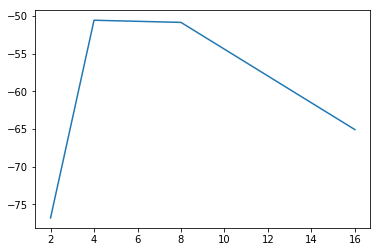

In [4]:
logptests_means = np.mean(np.array(logptests), axis=1)
plt.plot(Ns, logptests_means)
plt.show()

Telling from the plot, it looks like N=4 is slightly better than N=8.

## Question 2: Text modeling and generation (30 P)

We would like to train an HMM on character sequences taken from English text. We use the 20 newsgroups dataset that is accessible via scikits-learn http://scikit-learn.org/stable/datasets/twenty_newsgroups.html. (For this, you need to install scikits-learn if not done already.) Documentation is available on the website. The code below allows you to (1) read the dataset, (2) sample HMM-readable sequences from it, and (3) convert them back into string of characters.

In [5]:
from sklearn.datasets import fetch_20newsgroups

# Download a subset of the newsgroup dataset
newsgroups_train = fetch_20newsgroups(subset='train',categories=['sci.med'])
newsgroups_test  = fetch_20newsgroups(subset='test' ,categories=['sci.med'])

# Sample a sequence of T characters from the dataset
# that the HMM can read (0=whitespace 1-26=A-Z).
#
# Example of execution:
# O = sample(newsgroups_train.data)
# O = sample(newsgroups_test.data)
#
def sample(data,T=50):
    i = np.random.randint(len(data))
    O = data[i].upper().replace('\n',' ')
    O = np.array([ord(s) for s in O])
    O = np.maximum(O[(O>=65)*(O<90)+(O==32)]-64,0)
    j = np.random.randint(len(O)-T)
    return O[j:j+T]

# Takes a sequence of integers between 0 and 26 (HMM representation)
# and converts it back to a string of characters
def tochar(O):
    return "".join(["%s"%chr(o) for o in (O+32*(O==0)+64*(O>0.5))])

### Question 2a (15 P)

In order to train the HMM, we use a stochastic optimization algorithm where the Baum-Welch procedure is applied to randomly drawn sequences of $T=50$ characters at each iteration. The HMM has 27 visible states (A-Z + whitespace) and 200 hidden states. Because the Baum-Welch procedure optimizes for the sequence taken as input, and no necessarily the full text, it can take fairly large steps in the parameter space, which is inadequate for stochastic optimization. We consider instead for the parameters $\lambda = (A,B,\Pi)$ the update rule $\lambda^{new} = (1-\gamma) \lambda + \gamma \bar \lambda$, where $\bar \lambda$ contains the candidate parameters obtained from Equations 40a-c. A reasonable value for $\gamma$ is $0.1$.

* *Create* a new class `HMMChar` that extends the class `HMM` provided in `hmm.py`.
* *Implement* for this class a new method `HMMchar.learn(self)` that overrides the original methods, and implements the proposed update rule instead.
* *Implement* the stochastic training procedure and run it.
* *Monitor* $\log p(O|\lambda)$ on the test set at multiple iterations for sequences of same length as the one used for training. (Hint: for less noisy log-probability estimates, use several sequences or a moving average.)

In [45]:
class HMMChar(hmm.HMM):
    
    def learn(self, learning_rate=0.1):
        A_old = self.A.copy()
        B_old = self.B.copy()
        Pi_old = self.Pi.copy()
        
        super(HMMChar, self).learn()
        
        self.A = (1-learning_rate)*A_old + learning_rate*self.A
        self.B = (1-learning_rate)*B_old + learning_rate*self.B
        self.Pi = (1-learning_rate)*Pi_old + learning_rate*self.Pi
        
        
    def generate(self, T):
        chars = []
        q = np.random.choice(200, p=hmmchar.Pi)
        for _ in range(T):
            chars.append(np.random.choice(27, p=hmmchar.B[q, :]))
            q = np.random.choice(200, p=hmmchar.A[q, :])
        assert len(chars) == T
        return np.array(chars)

In [46]:
hmmchar = HMMChar(200, 27)
trainsample = lambda: sample(newsgroups_train.data)
testsample  = lambda: sample(newsgroups_test.data)

logptests = []

for i in range(1000):
    hmmchar.loaddata(trainsample())
    hmmchar.forward()
    hmmchar.backward()
    hmmchar.learn()

    logptrain = np.log(sum(hmmchar.beta[0]))

    hmmchar.loaddata(testsample())
    hmmchar.forward()
    hmmchar.backward()
    logptest = np.log(sum(hmmchar.beta[0]))
    logptests.append(logptest)

    if i % 100 == 0:
        print "it= {} logptrain= {} logptest= {}".format(i, logptrain, logptest)

it= 0 logptrain= -155.786853858 logptest= -150.191175257
it= 100 logptrain= -126.006522059 logptest= -118.591395808
it= 200 logptrain= -123.769033081 logptest= -124.969429353
it= 300 logptrain= -121.049047879 logptest= -139.23643096
it= 400 logptrain= -121.162338575 logptest= -114.044199682
it= 500 logptrain= -116.374569771 logptest= -126.051632995
it= 600 logptrain= -113.052174043 logptest= -128.4815319
it= 700 logptrain= -109.730052319 logptest= -125.71208613
it= 800 logptrain= -125.66720214 logptest= -113.535553436
it= 900 logptrain= -108.513307265 logptest= -101.249408284


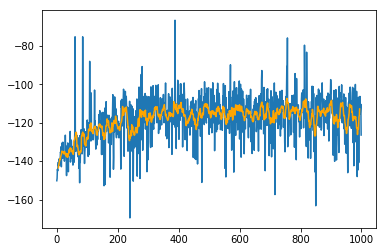

In [47]:
logptests_mean = [np.mean(logptests[i-5:i+5]) for i in range(5, 995)]
plt.plot(logptests)
plt.plot(np.arange(5, 995), logptests_mean, color='orange')
plt.show()

### Question 2b (15 P)

In order to visualize what the HMM has learned, we would like to generate random text from it. A well-trained HMM should generate character sequences that have some similarity with the text it has been trained on.

* *Implement* a method `generate(self,T)` of the class `HMMChar` that takes as argument the length of the character sequence that has to be generated.
* *Test* your method by generating a sequence of 250 characters and comparing it with original text and a purely random sequence.
* *Discuss* how the generated sequences compare with written English and what are the advantages and limitations of the HMM for this problem.

In [53]:
print("original:\n"+tochar(sample(newsgroups_test.data,T=250)))
print("\nlearned:\n"+tochar(hmmchar.generate(250)))
print("\nrandom:\n" +tochar(HMMChar(200,27).generate(250)))

original:
 INCLUDE  A DATABASE OF ELECTRONIC PATIENT CHART RECORDS      COMBINED WITH ACCESS TO A KNOWLEDGE BASE OF INFORMATION      RESOURCES SUCH AS PDQ CANCERLIT AND MEDLINEAN      INTEGRATION OF DATA AND KNOWLEDGE COMBINED TO CREATE A      CLINICAL ONCOLOG

learned:
BIFAC ED AN   CHE FAI  ANE AGAMDIVTIMRER SSOES IL AUFTEO S MECODS IT FASNOARGTE TORTYORITED IS LADILL TOTEIN PUCT BEN HEIKE   PASDREVEECTER  IT AN  IN CACTAN  CRON HXSYB  N   N A HARD TORSED NLARESMIATT THINE CTID   REFHIN BOE THATTOT HIGOPK COM KVE 

random:
 PTIIG PA  CETIGEABFIASAFE MASKAN WIRE AFOCTICAMIINRITHFPER VATS  RSCO PASER IND CHER INTED  VIXA  THE   FOE WHAI    FLE ILS IRGCE  CILT RE GXSG FITE CPPAR INE PAX CAE  BOMIPRA SEINSMYERRTSOCA RICLTR  ANLRSOCHON  TLE  BLOTE PEBA LIPEN     BEMASRIENGE


The HMM generates shorter words that occur more often in written English than very long words which are generated more frequently using the random procedure. On the other hand, since at every step the emission only contains a single character, the produced words are not necessarily meaningful.